In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import sys
import pickle

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
sys.path.append(os.path.abspath("../src"))

In [4]:
import gather_data as struct

In [5]:
data_path = '../Data/NetflixViewingHistory.csv'
with open('../Data/api_key.pkl', 'rb') as hnd:
    key = pickle.load(hnd)['api_key']

In [6]:
data_pipeline = struct.DataPipeline(data_path, key)
data_pipeline.execute()

Total number of TV Show + Movies:  1405
TV Show vs Movie
Dataframe shape:  (1405, 6)
Starting Movie data pull 
Existing pickle exists
Number of movies:  48
Number of missing movies:  3
12    BoJack Horseman Christmas Special: Sabrina's C...
31                       Samurai Champloo: Unholy Union
45                     House of Cards: Season 1 (Recap)
Name: title_query, dtype: object
Starting TV data pull 
Existing pickle exists
Number of total shows watched:  1357
Number of unique shows watched:  74
Number of missing TV shows:  0
Series([], Name: Show Name, dtype: object)


In [7]:
dir(data_pipeline)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'all_movies_results_df',
 'all_tv_results_df',
 'data_path',
 'execute',
 'generate_movie_df',
 'generate_tv_df',
 'get_TV_show_details',
 'get_movie_API_results',
 'movie_df',
 'parse_netflix',
 'search',
 'tv_df']

In [8]:
shows = data_pipeline.all_tv_results_df

In [9]:
shows.shape

(1357, 25)

In [10]:
pd.options.display.max_columns

20

In [11]:
shows.head()

,Title,Date,Show Name,Season,Episode Name,TV_Show_flag,homepage,id,in_production,n_network,...,popularity,primary_network,primary_production_co,query_term,release_date,runtime,status,type,vote_average,vote_count
0,Dating Around: Season 1: Gurki,2019-03-03,Dating Around,1,Gurki,TV_Show,https://www.netflix.com/title/80204889,86807,True,1,...,0.915,Netflix,,Dating Around,2019-02-14,30,Returning Series,Reality,6.0,1
1,Dating Around: Season 1: Luke,2019-03-03,Dating Around,1,Luke,TV_Show,https://www.netflix.com/title/80204889,86807,True,1,...,0.915,Netflix,,Dating Around,2019-02-14,30,Returning Series,Reality,6.0,1
2,The Umbrella Academy: Season 1: We Only See Ea...,2019-02-19,The Umbrella Academy,1,We Only See Each Other at Weddings and Funerals,TV_Show,https://www.netflix.com/title/80186863,75006,True,1,...,64.690,Netflix,Dark Horse Entertainment,The Umbrella Academy,2019-02-15,60,Returning Series,Scripted,7.7,111
3,American Vandal: Season 1: Nailed,2018-11-19,American Vandal,1,Nailed,TV_Show,https://www.netflix.com/title/80117545,73126,False,1,...,6.797,Netflix,3 Arts Entertainment,American Vandal,2017-09-15,35,Ended,Miniseries,7.9,73
4,American Vandal: Season 1: A Limp Alibi,2018-11-19,American Vandal,1,A Limp Alibi,TV_Show,https://www.netflix.com/title/80117545,73126,False,1,...,6.797,Netflix,3 Arts Entertainment,American Vandal,2017-09-15,35,Ended,Miniseries,7.9,73


## Simple Agg Metrics

In [12]:
shows['Show Name'].value_counts(ascending=False)

Friends                              171
30 Rock                              134
The Office (U.S.)                    115
Parks and Recreation                  90
White Collar                          81
The Blacklist                         79
Dexter                                78
House of Cards                        58
Unbreakable Kimmy Schmidt             39
BoJack Horseman                       36
Brickleberry                          36
Orange Is the New Black               29
Marvel's Daredevil                    26
Narcos                                21
Black Mirror                          19
Peaky Blinders                        18
Scrubs                                18
How to Get Away With Murder           17
Gossip Girl                           16
Chelsea                               14
Archer                                13
Marvel's Luke Cage                    13
Arrow                                 12
That '70s Show                        11
Queen of the Sou

In [13]:
shows['type'].value_counts()

Scripted      1316
Miniseries      25
Talk Show       14
Reality          2
Name: type, dtype: int64

In [14]:
shows['primary_network'].value_counts()

NBC               589
Netflix           351
USA Network        92
Showtime           78
ABC                42
Comedy Central     36
FOX                34
The CW             31
BBC One            19
Channel 4          19
FX                 18
E4                 10
Rai 1               8
BBC Two             6
Fuji TV             5
HBO Canada          4
Spike               4
Adult Swim          4
CBS                 3
IFC                 2
ANIMAX              1
TBS                 1
Name: primary_network, dtype: int64

## Check Date Metrics

In [15]:
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


In [16]:
freq_val = 'M'
month_gb = shows.groupby(pd.Grouper(key='Date',freq= freq_val))

In [17]:
for n,data in month_gb:
    if data.shape[0]==0: 
        continue
        
    print(n, data.shape)

2013-09-30 00:00:00 (5, 25)
2013-10-31 00:00:00 (29, 25)
2014-03-31 00:00:00 (1, 25)
2014-04-30 00:00:00 (7, 25)
2014-05-31 00:00:00 (21, 25)
2014-06-30 00:00:00 (10, 25)
2014-07-31 00:00:00 (19, 25)
2014-10-31 00:00:00 (1, 25)
2014-11-30 00:00:00 (11, 25)
2015-01-31 00:00:00 (5, 25)
2015-02-28 00:00:00 (4, 25)
2015-04-30 00:00:00 (11, 25)
2015-05-31 00:00:00 (7, 25)
2015-09-30 00:00:00 (14, 25)
2015-10-31 00:00:00 (12, 25)
2015-11-30 00:00:00 (18, 25)
2015-12-31 00:00:00 (9, 25)
2016-01-31 00:00:00 (2, 25)
2016-02-29 00:00:00 (1, 25)
2016-03-31 00:00:00 (22, 25)
2016-04-30 00:00:00 (33, 25)
2016-05-31 00:00:00 (50, 25)
2016-06-30 00:00:00 (128, 25)
2016-07-31 00:00:00 (147, 25)
2016-08-31 00:00:00 (131, 25)
2016-09-30 00:00:00 (34, 25)
2016-10-31 00:00:00 (62, 25)
2016-11-30 00:00:00 (86, 25)
2016-12-31 00:00:00 (68, 25)
2017-01-31 00:00:00 (38, 25)
2017-02-28 00:00:00 (14, 25)
2017-03-31 00:00:00 (22, 25)
2017-04-30 00:00:00 (50, 25)
2017-05-31 00:00:00 (51, 25)
2017-06-30 00:00:00 (

In [18]:
month_gb_size = pd.DataFrame(month_gb.size()).rename({0:'Size'}, axis=1)

In [19]:
month_gb_size['Number of Unique Shows'] = month_gb['Show Name'].nunique()

In [20]:
month_gb_size['Average Runtime Shows'] = month_gb['runtime'].mean()
month_gb_size['Sum Runtime Shows'] = month_gb['runtime'].sum()

In [21]:
type_cnts = shows['type'].value_counts()

In [22]:
for show_type in type_cnts.index:
    month_gb_size['type_'+show_type] = month_gb['type'].apply(lambda x: sum(x == show_type))

In [23]:
month_gb_size.shape

(67, 8)

In [24]:
month_gb_size['type_Talk Show'].unique()

array([ 0,  1, 12])

In [25]:
month_gb_size.head()

,Size,Number of Unique Shows,Average Runtime Shows,Sum Runtime Shows,type_Scripted,type_Miniseries,type_Talk Show,type_Reality
Date,,,,,,,,
2013-09-30,5,2,23.200000,116,5,0,0,0
2013-10-31,29,4,51.103448,1482,29,0,0,0
2013-11-30,0,0,NaN,0,0,0,0,0
2013-12-31,0,0,NaN,0,0,0,0,0
2014-01-31,0,0,NaN,0,0,0,0,0


In [26]:
month_gb_size[month_gb_size != 0].shape

(67, 8)

In [27]:
month_gb_size.sort_values(ascending=False).head()

TypeError: sort_values() missing 1 required positional argument: 'by'

In [28]:
cnt_trace = go.Scatter(
    x = month_gb_size.index, 
    y = month_gb_size.values, 
    name = 'Count')

layout = dict(title= 'Size by ' + freq_val, 
             yaxis=dict(title="Number of Shows Watched"),
             xaxis=dict(title='Date'))
fig = go.Figure(data = [cnt_trace], layout=layout)

In [29]:
iplot(fig)

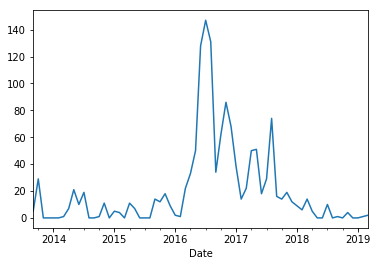

In [46]:
month_gb_size.plot()

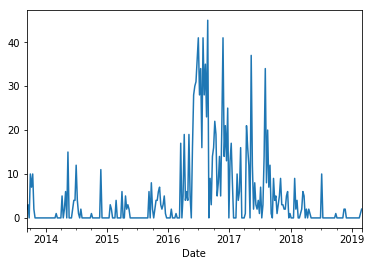

In [40]:
month_gb_size.plot()